# Do Ocean Worlds have stable climates?

If small rocky planet were covered in a planet spanning ocean, would it have a stable climate? The dominant source of silicate weathering for a planet covered in ~99% water or more would be seafloor weathering. Hence we must look at what happens to a planet with its carbon cycle entirely controlled by ocean chemistry. Previous studies of seafloor weathering only consider the kinetics of the reaction. However, seafloor weathering is likely to be thermodynamically limited. Hence, we apply a newer weathering model to the problem.

## Steady State Testing

To start we will find steady states of the slimate system by finding states where the weathering rate equals the outgassing rate for a range of instellations.  As outgassing rate is unknown we shall vary that too.

In [28]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../src'))

from kamino.planet import planet
from kamino.constants import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [29]:
# instellation_range = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4])
instellation_range = np.linspace(0.2, 1.5, num=20)
outgassing_range = np.array([0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0])
results_shape = (len(instellation_range), len(outgassing_range))
ocean_depth = 3000

We will first use the Maher & Chamberlain et al. (2014) or Walker et al. (1981) weathering model to provide a habitable zone baseline.

In [30]:
T_baseline = np.zeros(len(instellation_range))
pco2_baseline = np.zeros(len(instellation_range))
T_weather_baseline = np.zeros(len(instellation_range))

for i, s in enumerate(instellation_range):
    
    try:
        pl = planet(1e5, 3000, s, 1, 0.05, 50e6, 100, use_WHAK_weathering=True, albedo=0.05)
        T_s, pco2, _, _, _, weathering= pl.find_steady_state_no_evolution(diagnostic_plots=False)
    except ValueError:
        T_s, pco2, weathering = np.nan, np.nan, np.nan

    T_baseline[i] = T_s
    pco2_baseline[i] = pco2 * 1e-5 # convert to bar
    T_weather_baseline[i] = weathering

Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 254 K
P_CO2                : 8.4e+04 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 257 K
P_CO2                : 3.2e+04 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 262 K
P_CO2                : 8.5e+03 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 266 K
P_CO2                : 3.2e+03 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 271 K
P_CO2                : 8.2e+02 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 276 K
P_CO2                : 2.5e+02 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface

In [31]:
T_rapid = np.zeros(results_shape)
pco2_rapid = np.zeros(results_shape)
T_weather_rapid = np.zeros(results_shape)

for i, s in enumerate(instellation_range):
    for j, outgas in enumerate(outgassing_range):
    
        try:
            pl = planet(1e5, ocean_depth, s, outgas, 0.05, 50e6, 100)
            T_s, pco2, _, _, _, weathering= pl.find_steady_state_no_evolution(diagnostic_plots=False)
        except ValueError:
            T_s, pco2, weathering = np.nan, np.nan, np.nan

        T_rapid[i, j] = T_s
        pco2_rapid[i, j] = pco2 * 1e-5 # convert to bar
        T_weather_rapid[i, j] = weathering

Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 185 K
P_CO2                : 3.3e-02 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 196 K
P_CO2                : 3.3e-02 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 207 K
P_CO2                : 3.3e-02 Pa
Chemistry foun

In [32]:
T_tidal = np.zeros(results_shape)
pco2_tidal = np.zeros(results_shape)
T_weather_tidal = np.zeros(results_shape)

for i, s in enumerate(instellation_range):
    for j, outgas in enumerate(outgassing_range):
    
        try:
            pl = planet(1e5, ocean_depth, s, outgas, 0.05, 50e6, 100, tidally_locked=True)
            T_s, pco2, _, _, _, weathering = pl.find_steady_state_no_evolution(diagnostic_plots=False)
        except ValueError:
            T_s, pco2, weathering = np.nan, np.nan, np.nan

        T_tidal[i, j] = T_s
        pco2_tidal[i, j] = pco2 * 1e-5 # convert to bar
        T_weather_tidal[i, j] = weathering

Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 206 K
P_CO2                : 3.3e-02 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 221 K
P_CO2                : 3.3e-02 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 235 K
P_CO2                : 3.3e-02 Pa
Chemistry foun

In [44]:
T_rapid_new = np.zeros(results_shape)
pco2_rapid_new = np.zeros(results_shape)
T_weather_rapid_new = np.zeros(results_shape)

for i, s in enumerate(instellation_range):
    for j, outgas in enumerate(outgassing_range):
    
        try:
            pl = planet(1e5, 0.1 * ocean_depth, s, outgas, 0.05, 50e6, 100)
            T_s, pco2, _, _, _, weathering= pl.find_steady_state_no_evolution(diagnostic_plots=False)
        except ValueError:
            T_s, pco2, weathering = np.nan, np.nan, np.nan

        T_rapid_new[i, j] = T_s
        pco2_rapid_new[i, j] = pco2 * 1e-5 # convert to bar
        T_weather_rapid_new[i, j] = weathering

Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 186 K
P_CO2                : 5.4e-02 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 196 K
P_CO2                : 5.4e-02 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 207 K
P_CO2                : 5.4e-02 Pa
Chemistry foun

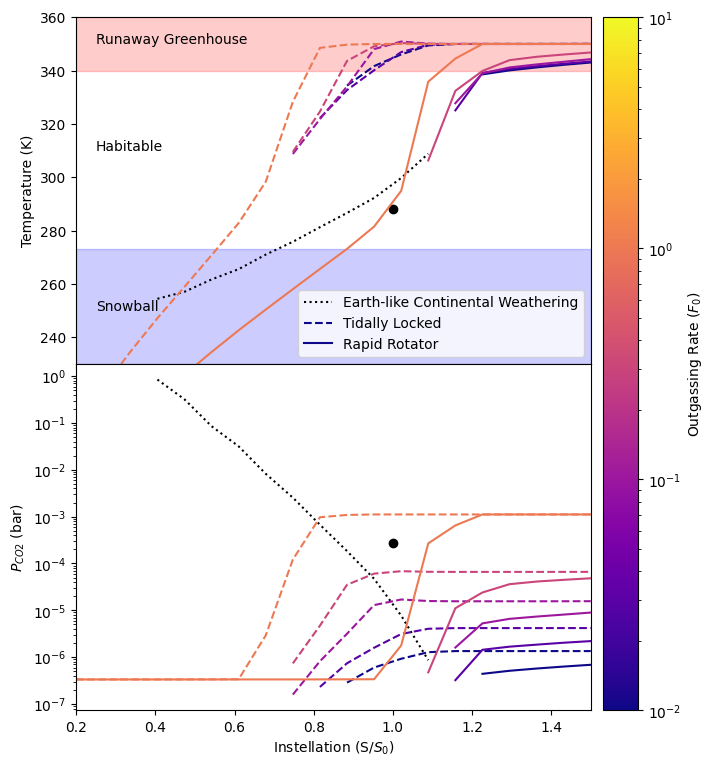

In [34]:
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 9), gridspec_kw={'hspace': 0.0})
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 9), gridspec_kw={'hspace': 0.0})

cmap = mpl.colormaps['plasma']
# norm = mpl.colors.Normalize(vmin=min(outgassing_range), vmax=max(outgassing_range))
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])

norm = mpl.colors.LogNorm(vmin=min(outgassing_range), vmax=max(outgassing_range))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

ax1.plot(instellation_range, T_baseline, color='black', label='Earth-like Continental Weathering', linestyle=':')
ax2.plot(instellation_range, pco2_baseline, color='black', linestyle=':')

for i, outgas in enumerate(outgassing_range):

    if i == 0:
        ax1.plot(instellation_range, T_tidal[:, i], color=cmap(norm(outgas)), label='Tidally Locked', linestyle='--')
        ax1.plot(instellation_range, T_rapid[:, i], color=cmap(norm(outgas)), label='Rapid Rotator')
    else:
        ax1.plot(instellation_range, T_tidal[:, i], color=cmap(norm(outgas)), linestyle='--')
        ax1.plot(instellation_range, T_rapid[:, i], color=cmap(norm(outgas)))

    ax2.plot(instellation_range, pco2_rapid[:, i], color=cmap(norm(outgas)))
    ax2.plot(instellation_range, pco2_tidal[:, i], color=cmap(norm(outgas)), linestyle='--')

cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.02)
cbar.set_label('Outgassing Rate ($F_{0}$)')

ax1.scatter(1, 288, c='black')
ax1.set_ylabel('Temperature (K)')
ax1.set_ylim(230, 360)
ax1.set_xlim(np.min(instellation_range), np.max(instellation_range))

ax1.axhspan(340, 360, color='red', alpha=0.2)
ax1.axhspan(273, 200, color='blue', alpha=0.2)
ax1.text(0.25, 350, 'Runaway Greenhouse')
ax1.text(0.25, 310, 'Habitable')
ax1.text(0.25, 250, 'Snowball')

ax1.legend()

ax2.scatter(1, 280e-6, c='black', label='Earth')
ax2.set_ylabel('$P_{CO2}$ (bar)')
ax2.set_yscale('log')

ax2.set_xlabel('Instellation (S/$S_0$)')
# ax3.set_ylabel('Weathering Temperature (K)')

plt.show()

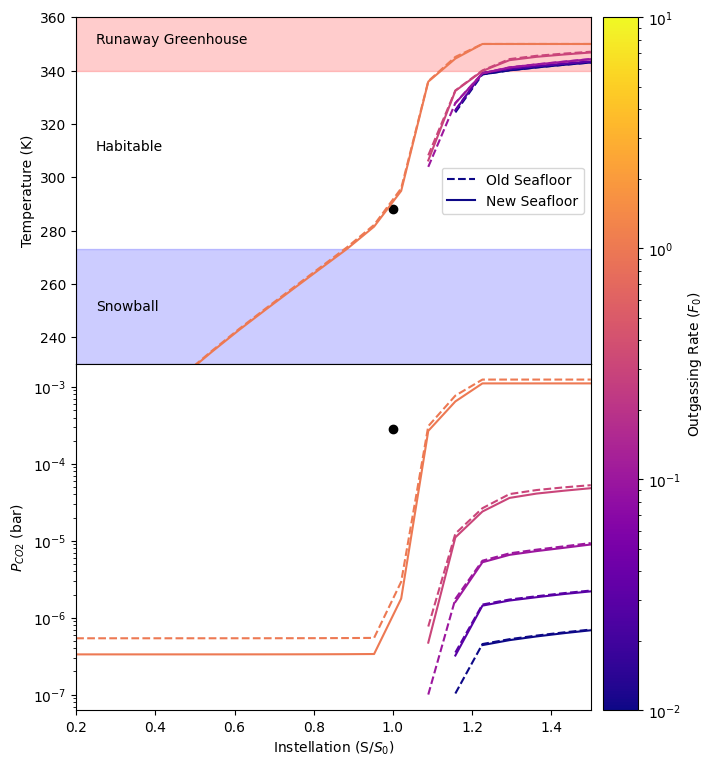

In [45]:
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 9), gridspec_kw={'hspace': 0.0})
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 9), gridspec_kw={'hspace': 0.0})

cmap = mpl.colormaps['plasma']
# norm = mpl.colors.Normalize(vmin=min(outgassing_range), vmax=max(outgassing_range))
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])

norm = mpl.colors.LogNorm(vmin=min(outgassing_range), vmax=max(outgassing_range))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# ax1.plot(instellation_range, T_baseline, color='black', label='Earth-like Continental Weathering', linestyle=':')
# ax2.plot(instellation_range, pco2_baseline, color='black', linestyle=':')

for i, outgas in enumerate(outgassing_range):

    if i == 0:
        ax1.plot(instellation_range, T_rapid_new[:, i], color=cmap(norm(outgas)), label='Old Seafloor', linestyle='--')
        ax1.plot(instellation_range, T_rapid[:, i], color=cmap(norm(outgas)), label='New Seafloor')
    else:
        ax1.plot(instellation_range, T_rapid_new[:, i], color=cmap(norm(outgas)), linestyle='--')
        ax1.plot(instellation_range, T_rapid[:, i], color=cmap(norm(outgas)))

    ax2.plot(instellation_range, pco2_rapid_new[:, i], color=cmap(norm(outgas)), linestyle='--')
    ax2.plot(instellation_range, pco2_rapid[:, i], color=cmap(norm(outgas)))

cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.02)
cbar.set_label('Outgassing Rate ($F_{0}$)')

ax1.scatter(1, 288, c='black')
ax1.set_ylabel('Temperature (K)')
ax1.set_ylim(230, 360)
ax1.set_xlim(np.min(instellation_range), np.max(instellation_range))

ax1.axhspan(340, 360, color='red', alpha=0.2)
ax1.axhspan(273, 200, color='blue', alpha=0.2)
ax1.text(0.25, 350, 'Runaway Greenhouse')
ax1.text(0.25, 310, 'Habitable')
ax1.text(0.25, 250, 'Snowball')

ax1.legend()

ax2.scatter(1, 280e-6, c='black', label='Earth')
ax2.set_ylabel('$P_{CO2}$ (bar)')
ax2.set_yscale('log')

ax2.set_xlabel('Instellation (S/$S_0$)')
# ax3.set_ylabel('Weathering Temperature (K)')

plt.show()

Running Depth Sweep...
Solving climate state...
Solved.
Surface Temperature  : 290 K
P_CO2                : 1.3e-01 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 290 K
P_CO2                : 1.3e-01 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 290 K
P_CO2                : 1.3e-01 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 290 K
P_CO2                : 1.3e-01 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 290 K
P_CO2                : 1.3e-01 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 290 K
P_CO2                : 1.3e-01 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
Solved.
Surface Temperature  : 290 K
P_CO2                : 1.3e-01 Pa
Chemistry found      : nan, nan, na

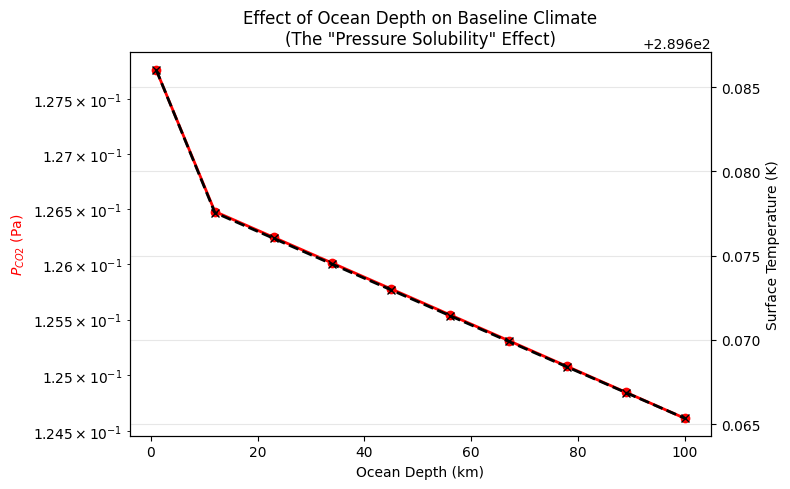

In [46]:
# Common Parameters
P_surf = 1e5
S0 = 1.0
volcano = 1.0
# Use the "stable" weathering (Arrhenius) to ensure we find steady states easily
# or use your standard one to see the "Hot House" shift more dramatically.
# We will use the standard one (False) to match your first model.
USE_MAC = False 

# ==========================================
# EXPERIMENT 1: THE PRESSURE COOKER
# Vary Depth, Measure Steady State
# ==========================================
depths = np.linspace(1.0, 100.0, 10) # 1km to 100km oceans
pco2_results = []
temp_results = []

print("Running Depth Sweep...")
for d in depths:
    # Initialize planet with specific depth
    pl = planet(P_surf, d, S0, volcano, 0.05, 50e6, 100, 
                use_MAC_weathering=USE_MAC)
    
    # Find steady state (using the algebraic solver for speed)
    # We use solve_chemistry=False just to get the climate state quickly
    try:
        T, P, _, _, _, _ = pl.find_steady_state_no_evolution()
        if np.isnan(T): raise ValueError
        pco2_results.append(P)
        temp_results.append(T)
    except:
        pco2_results.append(np.nan)
        temp_results.append(np.nan)

# Plot 1
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_xlabel('Ocean Depth (km)')
ax1.set_ylabel('$P_{CO2}$ (Pa)', color='red')
ax1.plot(depths, pco2_results, 'r-o', linewidth=2)
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.set_ylabel('Surface Temperature (K)', color='black')
ax2.plot(depths, temp_results, 'k--x', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Effect of Ocean Depth on Baseline Climate\n(The "Pressure Solubility" Effect)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Do these worlds have stable climates?

We have found planets where the outgassing rates are equal to the weathering rates. Now we must see if these have stable climates. We will take a selection of these planets and test their stability. 

In [36]:
T_rapid = np.zeros(results_shape)
pco2_rapid = np.zeros(results_shape)
T_weather_rapid = np.zeros(results_shape)

for i, s in enumerate(instellation_range):
    for j, outgas in enumerate(outgassing_range):
    
        try:
            pl = planet(1e5, 3000, s, outgas, 0.05, 50e6, 100)
            T_s, pco2, _, _, _, weathering= pl.find_steady_state_no_evolution(diagnostic_plots=False)
        except ValueError:
            T_s, pco2, weathering = np.nan, np.nan, np.nan

        T_rapid[i, j] = T_s
        pco2_rapid[i, j] = pco2 * 1e-5 # convert to bar
        T_weather_rapid[i, j] = weathering

Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 185 K
P_CO2                : 3.3e-02 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 196 K
P_CO2                : 3.3e-02 Pa
Chemistry found      : nan, nan, nan mol/kgw
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
No solution.
Solving climate state...
Solved.
Surface Temperature  : 207 K
P_CO2                : 3.3e-02 Pa
Chemistry foun